In [90]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [91]:
csv_path = Path("../data_cleaning/OSMI_clean.csv")

In [92]:
df = pd.read_csv(csv_path)
df.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),comfortable discussing a mental health issue with coworkers,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,year
0,1.0,No,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Yes,Yes,100-500,1.0,"Yes, I experienced","Yes, I experienced",27.0,Female,United Kingdom,NaN,2017
1,1.0,Yes,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Maybe,Yes,100-500,2.0,"Yes, I observed",Maybe/Not sure,31.0,male,United Kingdom,NaN,2017
2,1.0,I don't know,No,Yes,Yes,Yes,1.0,Yes,Difficult,Yes,Maybe,6-25,1.0,"Yes, I experienced","Yes, I experienced",36.0,male,United States of America,White,2017
3,1.0,Yes,Yes,Yes,Yes,I don't know,1.0,Yes,Difficult,Yes,Yes,More than 1000,2.0,Maybe/Not sure,Maybe/Not sure,22.0,Male,United States of America,White,2017
4,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,No,"Yes, I observed",52.0,female,United States of America,More than one of the above,2017


In [93]:
df_demographics = df[["employer provided mental healthcare awareness", "Gender", "Age", "Country of residence", "year"]]
df_demographics.head()

,employer provided mental healthcare awareness,Gender,Age,Country of residence,year
0,Yes,Female,27.0,United Kingdom,2017
1,Yes,male,31.0,United Kingdom,2017
2,No,male,36.0,United States of America,2017
3,Yes,Male,22.0,United States of America,2017
4,NaN,female,52.0,United States of America,2017


In [94]:
df_demographics_filtered = df_demographics.dropna()

In [95]:
df_demographics_filtered["Gender"].unique()

array(['Female', 'male', 'Male', 'F', 'M', 'female', 'Man', 'f',
       'Genderfluid', 'Nonbinary', 'Female ', 'cis-male', 'Mail', 'Woman',
       'cis hetero male', 'm', 'femalw', 'femail', 'Male (cis)',
       'uhhhhhhhhh fem genderqueer?', 'female (cis)',
       'God King of the Valajar', 'Cis male', 'man', 'My sex is female.',
       'Non-binary', 'cis male ', 'Agender/genderfluid', 'Male ', 'woman',
       'sometimes', 'female (cisgender)', 'Female (cis) ', 'Contextual',
       'Non binary', 'Genderqueer demigirl', 'cis-Female', 'cis female',
       'F, cisgender', '\\-', 'Transfeminine', 'Cis-male', 'Cis Male',
       'dude', 'Ostensibly Male', 'Agender',
       'male, born with xy chromosoms', 'I identify as female',
       'Trans man', 'transgender', 'cis male', 'non binary',
       'Female/gender non-binary.', 'Cis woman', 'Female (cisgender)',
       'Cis-Female', 'Cisgendered woman', 'Trans woman', 'genderfluid',
       'Genderqueer', 'Demiguy', 'none', 'Trans female', 'Cisg

In [96]:
replace_values = ['F', 'female', 'Female', 'Woman', 'femalw', 'femail', 'female (cis)','Female ','f','My sex is female.',
                  'My sex is female', 'woman', 'female (cisgender)', 'Female (cis)','Female/gender non-binary.',
                  'Genderqueer demigirl', 'cis-Female', 'cis female', 'F', 'Female (cis) ', 'cisgender',
                  'born with xy chromosoms', 'I identify as female', 'Cis woman','Female/gender non-binary.'
                  'Female (cisgender)', 'Cis-Female', 'Cisgendered woman', 'Trans woman',
                  'She/her/they/them', 'cisgender female', 'cis woman', 'Agender trans woman',
                  'femmina', 'Femile', 'Female (cis)', 'FEMALE', 'female, she/her']


In [97]:
df_demographics_filtered.loc[:, "Gender"] = df_demographics_filtered["Gender"].replace(replace_values, "Female")
df_demographics_filtered["Gender"].unique()

array(['Female', 'male', 'Male', 'M', 'Man', 'Genderfluid', 'Nonbinary',
       'cis-male', 'Mail', 'cis hetero male', 'm', 'Male (cis)',
       'uhhhhhhhhh fem genderqueer?', 'God King of the Valajar',
       'Cis male', 'man', 'Non-binary', 'cis male ',
       'Agender/genderfluid', 'Male ', 'sometimes', 'Contextual',
       'Non binary', 'F, cisgender', '\\-', 'Transfeminine', 'Cis-male',
       'Cis Male', 'dude', 'Ostensibly Male', 'Agender',
       'male, born with xy chromosoms', 'Trans man', 'transgender',
       'cis male', 'non binary', 'Female (cisgender)', 'genderfluid',
       'Genderqueer', 'Demiguy', 'none', 'Trans female', 'Cisgender male',
       'non-binary', 'Other', 'SWM', 'NB', 'gender non-conforming woman',
       'Let\'s keep it simple and say "male"', 'Identify as male',
       'Masculine', 'Cishet male', 'agender', 'Questioning', '43',
       'masculino', 'Make', 'Trans non-binary/genderfluid', 'CIS Male',
       'Non-binary and gender fluid', 'mostly male', 'c

In [98]:
replace_values = ['male', 'Male', 'M', 'Man','cis-male', 'Mail', 'cis hetero male', 'm', 'Male (cis)','God King of the Valajar','male, born with xy chromosoms',
       'Cis male', 'man','cis male ','Male ', 'Cis-male', 'Cis Male','dude', 'Ostensibly Male','male','cis male', 'Male','dude', 'Ostensibly Male','male','cis male','Cisgender male','Let\'s keep it simple and say "male"','Identify as male','Masculine','Cishet male','mostly male', 'cisgender male',
       'MAle','MALE', 'male/he/him','cis-het male']

In [100]:
df_demographics_filtered.loc[:, "Gender"] = df_demographics_filtered["Gender"].replace(replace_values, "Male")
df_demographics_filtered["Gender"].unique()

array(['Female', 'Male', 'Genderfluid', 'Nonbinary',
       'uhhhhhhhhh fem genderqueer?', 'Non-binary', 'Agender/genderfluid',
       'sometimes', 'Contextual', 'Non binary', 'F, cisgender', '\\-',
       'Transfeminine', 'Agender', 'Trans man', 'transgender',
       'non binary', 'Female (cisgender)', 'genderfluid', 'Genderqueer',
       'Demiguy', 'none', 'Trans female', 'non-binary', 'Other', 'SWM',
       'NB', 'gender non-conforming woman', 'agender', 'Questioning',
       '43', 'masculino', 'Make', 'Trans non-binary/genderfluid',
       'CIS Male', 'Non-binary and gender fluid', 'afab non-binary',
       'homem cis', 'Non-binary/Agender'], dtype=object)

In [105]:
replace_values = ['Genderfluid','Nonbinary','uhhhhhhhhh fem genderqueer?','Non-binary','Agender/genderfluid','sometimes','Contextual',
                  'Non binary','F','cisgender','Transfeminine', 'Agender', 'Trans man', 'transgender', 'Female (cisgender)',
                  'Genderqueer', 'Demiguy', 'none', 'Trans female', 'Other', 'SWM', 'NB', 'gender non-conforming woman','Questioning',
                  '43', 'masculino', 'Make', 'Trans non-binary/genderfluid', 'CIS Male', 'Non-binary and gender fluid', 'afab non-binary',
                  'homem cis', 'Non-binary/Agender', 'F, cisgender', '\\-', 'non binary',
       'genderfluid', 'non-binary', 'agender']

In [106]:
df_demographics_filtered.loc[:, "Gender"] = df_demographics_filtered["Gender"].replace(replace_values, "Other")
df_demographics_filtered["Gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [77]:
df_demographics_filtered.loc[ : "Age"] = df_demographics_filtered[df_demographics_filtered["Age"] > 20]

In [115]:
output_file_path = "Output/df_demographics_filtered.csv"


In [128]:
df_demographics_filtered.to_csv(output_file_path, index=False)

In [118]:
df_demographics_filtered.head()

,employer provided mental healthcare awareness,Gender,Age,Country of residence,year
0,Yes,Female,27.0,United Kingdom,2017
1,Yes,Male,31.0,United Kingdom,2017
2,No,Male,36.0,United States of America,2017
3,Yes,Male,22.0,United States of America,2017
5,No,Male,30.0,United States of America,2017


In [133]:
#x_axis = df_demographics_filtered['Gender'].unique.value_counts()
#x_axis 
x_axis = df_demographics_filtered['Gender'].unique()
y_axis = df_demographics_filtered.groupby("employer provided mental healthcare awareness").value_counts()


array(['Female', 'Male', 'Other'], dtype=object)

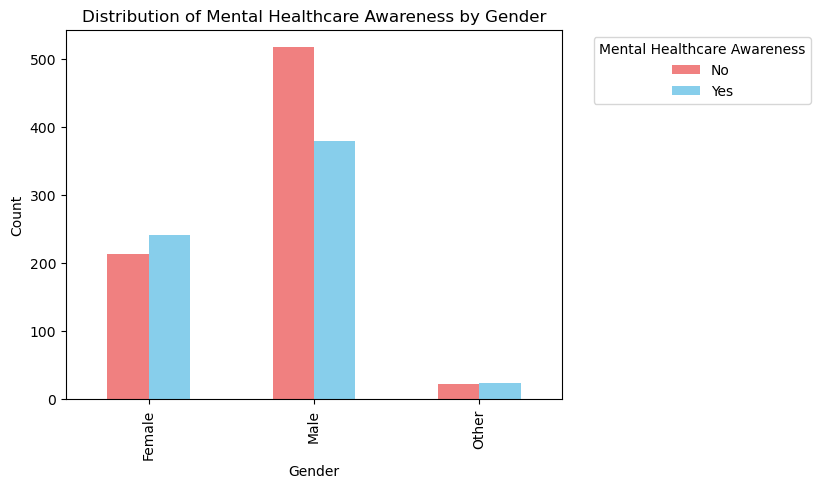

In [138]:
grouped_data = df_demographics_filtered.groupby(['Gender', 'employer provided mental healthcare awareness']).size().unstack()
grouped_data.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Distribution of Mental Healthcare Awareness by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Healthcare Awareness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()